# Survival on the Titanic

This report investigates the data included in the dataset titanic_data.csv, downloaded from [Udacity](https://www.udacity.com/)  for the final project of the [Intro to Data Analysis](https://www.udacity.com/course/intro-to-data-analysis--ud170) course.

The purpose of this report is to investigate which factors contributed to the passengers' likelihood to survive. The factors that were investigated include:
- Ticket class
- Sex
- Age
- Number of siblings/ spouses onboard
- Number of parents/ children onboard
- Passenger fare
- Port of embarkation

For more detailed information on the dataset please visit [Kaggle](https://www.kaggle.com/c/titanic/data), which is where Udacity obtained the data.

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Load Data from CSV

In [68]:
# Read in the data from titanic_data.csv and store it in the variable 'titanic'
titanic = pd.read_csv('titanic_data.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Investigating the Data

In [70]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


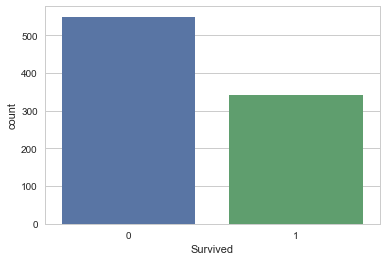

In [99]:
# A look at total number survived (1) vs. did not survive (0)
print(titanic['Survived'].value_counts())

sns.countplot(x='Survived', data=titanic)
plt.show()

In [74]:
# Group the passengers by survival outcome and look at the mean of numerical variables
titanic_by_survival = titanic.groupby('Survived')

titanic_by_survival.mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64


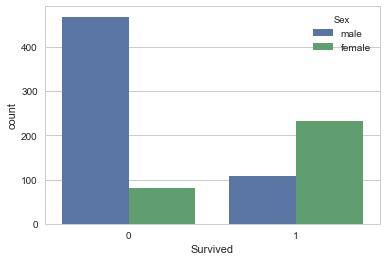

In [97]:
# Compare counts of sex between survival outcomes
print(titanic_by_survival['Sex'].value_counts())

sns.countplot(x='Survived', hue='Sex', data=titanic)
plt.show()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64


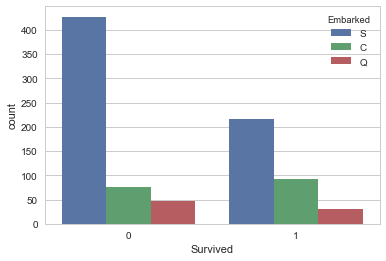

In [98]:
# Compare counts of port of embarkation for survival outcomes
print(titanic_by_survival['Embarked'].value_counts())

sns.countplot(x='Survived', hue='Embarked', data=titanic)
plt.show()

### Initial Observations

- There were more passengers that did not survive than those that did
- The average ticket class was higher (meaning a lower socioeconomic class) for those who did not survive compared to those who did
- The average age and number of siblings or spouses aboard were higher for those who did not survive
- The average number of parents/ children aboard and value of the fare paid were lower for those who did not survive
- A higher proportion of females survived compared to males
- On the surface, there are no obvious differences in port of embarkation between those who survived and those who didn't

# Data Analysis

To analyze the data I will do the following:
1. Calculate the survival rate for passengers grouped by each variable and display in a table -- break into bins for number variables???
2. Calculate the correlation (Pearson's r) between survival and each variable
3. Perform a binary logistic regression


*Note: 'Survival rate' is being defined as:*
$$\frac{Number of passengers survived}{Total number of passengers}$$
*The survival rate is being calculated by taking the mean of the 'Survived' column in the DataFrame since passengers who survived are represented by a value of 1 in the data.*